# X-Football League Data Analysis
____
### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning
____
#### Reading file into dataframe

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931-32,1


We notice that column names start from row 2, so making suitable changes

In [3]:
df.rename(columns=df.iloc[0],inplace=True)
df=df[1:]
df.info() #Checking type of data in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 1 to 61
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pos           61 non-null     object
 1   Team          61 non-null     object
 2   Seasons       61 non-null     object
 3   Points        61 non-null     object
 4   GamesPlayed   61 non-null     object
 5   GamesWon      61 non-null     object
 6   GamesDrawn    61 non-null     object
 7   GamesLost     61 non-null     object
 8   GoalsFor      61 non-null     object
 9   GoalsAgainst  61 non-null     object
 10  Champion      61 non-null     object
 11  Runner-up     61 non-null     object
 12  Third         61 non-null     object
 13  Fourth        61 non-null     object
 14  Fifth         61 non-null     object
 15  Sixth         61 non-null     object
 16  Debut         61 non-null     object
 17  BestPosition  61 non-null     object
dtypes: object(18)
memory usage: 8.7+ KB


#### Replacing the ' - ' with 0 : So that arithmetic operations can be performed on the data

In [4]:
df.replace(to_replace='-',value=0,inplace=True)

#### Converting object into numeric to perform numerical calculations on data frame

In [5]:
for i in df.columns:
    if i!='Team' and i!='Debut':
        df[i] = df[i].apply(pd.to_numeric)
df.info() #Checking after converting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 1 to 61
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pos           61 non-null     int64 
 1   Team          61 non-null     object
 2   Seasons       61 non-null     int64 
 3   Points        61 non-null     int64 
 4   GamesPlayed   61 non-null     int64 
 5   GamesWon      61 non-null     int64 
 6   GamesDrawn    61 non-null     int64 
 7   GamesLost     61 non-null     int64 
 8   GoalsFor      61 non-null     int64 
 9   GoalsAgainst  61 non-null     int64 
 10  Champion      61 non-null     int64 
 11  Runner-up     61 non-null     int64 
 12  Third         61 non-null     int64 
 13  Fourth        61 non-null     int64 
 14  Fifth         61 non-null     int64 
 15  Sixth         61 non-null     int64 
 16  Debut         61 non-null     object
 17  BestPosition  61 non-null     int64 
dtypes: int64(16), object(2)
memory usage: 8.7+ KB


### Data Analysis
____
### 1. What is the top position (using BestPosition column)? 

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

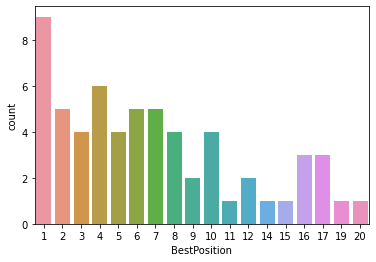

In [6]:
#Checking the distribution
sns.countplot(df['BestPosition'])

In [7]:
#Fetching out the top position
df[['BestPosition']].value_counts().head(1)
#Ans : Position 1 has the most occurence and is best!

BestPosition
1               9
dtype: int64

### 2. Which teams started playing between 1930-1980 (using “Debut” column) (inclusive of 1930)?

In [8]:
condition0 = (df['Debut']>='1930')&(df['Debut']<'1980')
df[condition0]

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931-32,1
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,1934-35,1
9,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,1939-40,2
10,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,1932-33,1
11,11,Deportivo La Coruna,45,1814,1530,563,392,575,2052,2188,1,5,4,1,0,1,1941-42,1
12,12,Celta Vigo,51,1789,1698,586,389,723,2278,2624,0,0,0,2,4,5,1939-40,4
13,13,Valladolid,42,1471,1466,463,384,619,1767,2180,0,0,0,1,1,1,1948-49,4
15,15,Sporting Gijon,43,1389,1458,471,358,629,1753,2152,0,1,1,2,2,1,1944-45,2
16,16,Osasuna,37,1351,1318,426,327,565,1500,1834,0,0,0,2,2,2,1935-36,4
17,17,Malaga,36,1314,1255,390,330,535,1421,1763,0,0,0,1,0,1,1949-50,4


In [9]:
df[condition0]['Team'].to_list()

['Valencia',
 'Sevilla',
 'Zaragoza',
 'Real Betis',
 'Deportivo La Coruna',
 'Celta Vigo',
 'Valladolid',
 'Sporting Gijon',
 'Osasuna',
 'Malaga',
 'Oviedo',
 'Mallorca',
 'Las Palmas',
 'Granada',
 'Rayo Vallecano',
 'Elche',
 'Hercules',
 'Tenerife',
 'Murcia',
 'Alaves',
 'Levante',
 'Salamanca',
 'Sabadell',
 'Cadiz',
 'Castellon',
 'Cordoba',
 'Recreativo',
 'Burgos CF',
 'Pontevedra',
 'Gimnastic',
 'Alcoyano',
 'Jaen',
 'AD Almeria',
 'Lleida',
 'Condal',
 'Atletico Tetuan',
 'Cultural Leonesa']

### 3. What are the top 5 teams in terms of points?

In [10]:
# One way to do this
top_5 = df['Points'].head(5).to_list()
def find_top5(var):
    if var in top_5:
        return True
    else:
        return False

df[df['Points'].apply(find_top5)][['Team','Points']]

,Team,Points
1,Real Madrid,4385
2,Barcelona,4262
3,Atletico Madrid,3442
4,Valencia,3386
5,Athletic Bilbao,3368


### 4. What is the difference between the goals scored 'for' vs 'against' for various teams?

In [11]:
# This function returns the value of Goal Differences for all the teams.
# Goal_diff_count = GoalsFor - GoalsAgainst
def Goal_diff_count(tm_name):
    tmp_df = df[df['Team']==tm_name]
    tmp_df['Difference_in_Goals'] = tmp_df['GoalsFor']-tmp_df['GoalsAgainst']
    return tmp_df[['Team','Difference_in_Goals']]

Goal_diff_count(df['Team'])

,Team,Difference_in_Goals
1,Real Madrid,2807
2,Barcelona,2786
3,Atletico Madrid,1225
4,Valencia,929
5,Athletic Bilbao,931
...,...,...
57,Xerez,-28
58,Condal,-20
59,Atletico Tetuan,-34
60,Cultural Leonesa,-31


### 5. Find the team which has a maximum and minimum goal difference?

In [12]:
df_Q5 = Goal_diff_count(df['Team'])
#Defining Conditions
c1 = df_Q5['Difference_in_Goals']==df_Q5['Difference_in_Goals'].max()
c2 = df_Q5['Difference_in_Goals']==df_Q5['Difference_in_Goals'].min()
#Desired data
print('\nTeam with Maximum goal difference:\n\n',df_Q5[c1])
print('\n\nTeam with Minimum goal difference: \n\n',df_Q5[c2])


Team with Maximum goal difference:

           Team  Difference_in_Goals
1  Real Madrid                 2807


Team with Minimum goal difference: 

                 Team  Difference_in_Goals
14  Racing Santander                 -525


### 6. Find the Winning percentage for respective teams?
##### Percentage of Winning  = (GamesWon / GamesPlayed)*100

In [13]:
df['Winning_Percent'] = df['GamesWon']*100/df['GamesPlayed']

#If there are any numerical error, replace it with 0%
df['Winning_Percent'] = df['Winning_Percent'].replace([np.nan],0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 1 to 61
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pos              61 non-null     int64  
 1   Team             61 non-null     object 
 2   Seasons          61 non-null     int64  
 3   Points           61 non-null     int64  
 4   GamesPlayed      61 non-null     int64  
 5   GamesWon         61 non-null     int64  
 6   GamesDrawn       61 non-null     int64  
 7   GamesLost        61 non-null     int64  
 8   GoalsFor         61 non-null     int64  
 9   GoalsAgainst     61 non-null     int64  
 10  Champion         61 non-null     int64  
 11  Runner-up        61 non-null     int64  
 12  Third            61 non-null     int64  
 13  Fourth           61 non-null     int64  
 14  Fifth            61 non-null     int64  
 15  Sixth            61 non-null     int64  
 16  Debut            61 non-null     object 
 17  BestPosition     6

### 7. What are the top 5 teams according to their Winning percentage?

In [15]:
top_5 = df['Winning_Percent'].head(5).to_list()
def find_top5(var):
    if var in top_5:
        return True
    else:
        return False

df[df['Winning_Percent'].apply(find_top5)][['Team','Winning_Percent']]

,Team,Winning_Percent
1,Real Madrid,59.630702
2,Barcelona,57.241130
3,Atletico Madrid,47.475134
4,Valencia,44.557057
5,Athletic Bilbao,43.772629


### 8. What are the total points scored according to BestPosition?

In [16]:
df_grp = df.groupby(by='BestPosition')
df_grp['Points'].sum()
pd.DataFrame(data=df_grp['Points'].sum())

,Points
BestPosition,
1,27933
2,6904
3,5221
4,6563
5,1884
6,2113
7,1186
8,1134
9,96
